In [2]:
import torch
mol_cross_attention=torch.load('mol_cross_attention.pt')
print(mol_cross_attention)

Parameter containing:
tensor([[-0.0564,  0.0358,  0.0203,  ..., -0.0339, -0.0376,  0.0131],
        [-0.0217, -0.0016, -0.0049,  ..., -0.0157,  0.0219, -0.0115],
        [-0.0400, -0.0016,  0.0088,  ..., -0.0034,  0.0267, -0.0062],
        ...,
        [ 0.0429, -0.0204,  0.0108,  ...,  0.0355, -0.0215,  0.0355],
        [-0.0134, -0.0557, -0.0379,  ...,  0.0414, -0.0571, -0.0531],
        [-0.0469, -0.0208,  0.0496,  ..., -0.0306, -0.0039,  0.0321]],
       device='cuda:1', requires_grad=True)


In [3]:
import torch
smile_cross_attention=torch.load('smile_cross_attention.pt')
print(smile_cross_attention)

Parameter containing:
tensor([[-0.0032, -0.0556,  0.0527,  ..., -0.0054, -0.0258,  0.0526],
        [ 0.0517,  0.0460, -0.0030,  ...,  0.0017, -0.0158, -0.0050],
        [ 0.0609,  0.0099,  0.0473,  ...,  0.0292,  0.0347,  0.0229],
        ...,
        [ 0.0314,  0.0189, -0.0186,  ...,  0.0517, -0.0612, -0.0315],
        [-0.0620, -0.0522, -0.0540,  ..., -0.0278,  0.0288,  0.0327],
        [ 0.0286,  0.0619, -0.0576,  ...,  0.0416,  0.0365,  0.0244]],
       device='cuda:1', requires_grad=True)


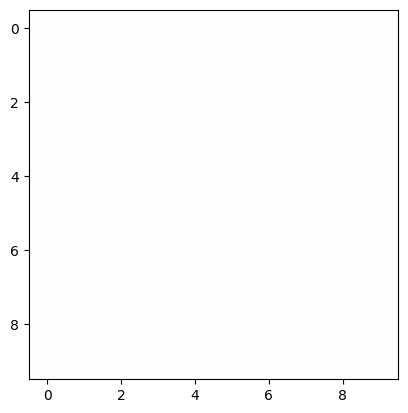

In [5]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
 
# 假设我们有一个CxHxW的特征图
#features = torch.randn(1, 20, 20)  # 示例特征图: 1个通道，20x20
features= mol_cross_attention.reshape(1,256,256) 
#features= mol_cross_attention
#features=features.cpu().detach().numpy()
features=features[0,:10,:10]
# 定义一个将特征图转换为热力图的函数
def make_heatmap(heatmap):
    # 使用torch.softmax对特征图的每个通道进行归一化
    heatmap = nn.functional.softmax(heatmap, dim=0)
    heatmap=heatmap.cpu().detach().numpy()
    # 将归一化后的热力图转换为RGB图像
    #heatmap = heatmap.cpu().numpy()[0]  # 取出单个样本的热力图
    cmap = plt.get_cmap('jet')  # 选择一个颜色映射
    cmap_bg = cmap(0)  # 颜色映射的背景颜色
    heatmap = cmap(heatmap * 255)  # 对热力图进行颜色编码
    #heatmap = np.delete(heatmap, 3, 2)  # 删除alpha通道
    # 将背景颜色添加回热力图
    #heatmap_on_bg = np.where(heatmap[:, :, 0] == 0, cmap_bg[0] * 255, heatmap)
    #return heatmap_on_bg
    return heatmap
 
# 生成热力图
heatmap = make_heatmap(features)
#features=features.cpu().detach().numpy()
# 显示热力图
plt.imshow(heatmap.astype(np.uint8))
plt.show()

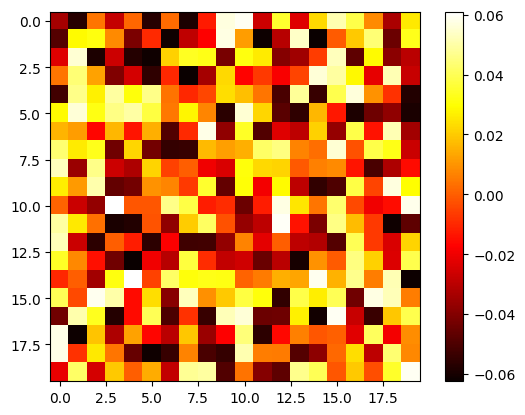

In [9]:
import numpy as np
import matplotlib.pyplot as plt
 
# 创建一个随机的NumPy数组
features= mol_cross_attention.reshape(256,256) 
#features = nn.functional.softmax(features, dim=0)
mol_features=features.cpu().detach().numpy()
mol_features=mol_features[100:120,100:120]
#array = np.random.rand(10, 10)  # 生成一个10x10的随机数组，数值在0到1之间
 
# 使用imshow显示热力图
plt.imshow(mol_features, cmap='hot', interpolation='nearest')  # cmap参数设置为'hot'以显示传统的红-黄-蓝热图
plt.colorbar()  # 显示颜色条以便了解各种颜色代表的数值范围
plt.show()

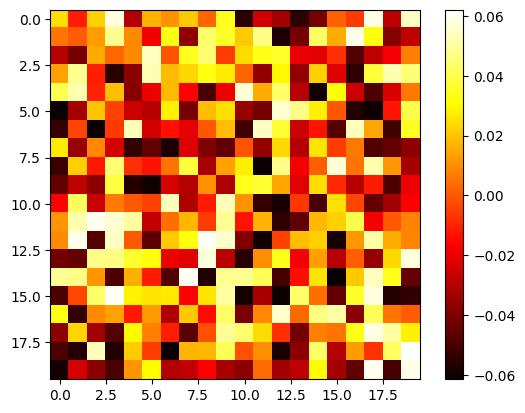

In [10]:
import numpy as np
import matplotlib.pyplot as plt
 
# 创建一个随机的NumPy数组
features= smile_cross_attention.reshape(256,256) 
#features = nn.functional.softmax(features, dim=0)
smile_features=features.cpu().detach().numpy()
smile_features=smile_features[100:120,100:120]
#array = np.random.rand(10, 10)  # 生成一个10x10的随机数组，数值在0到1之间
 
# 使用imshow显示热力图
plt.imshow(smile_features, cmap='hot', interpolation='nearest')  # cmap参数设置为'hot'以显示传统的红-黄-蓝热图
plt.colorbar()  # 显示颜色条以便了解各种颜色代表的数值范围
plt.show()

In [ ]:
import numpy as np
 
def euclidean_similarity(matrix1, matrix2):
    diff = matrix1 - matrix2
    distance = np.linalg.norm(diff)
    similarity = 1 / (1 + distance)
    return similarity

In [11]:
import numpy as np
 
def cosine_similarity(matrix1, matrix2):
    dot_product = np.dot(matrix1.flatten(), matrix2.flatten())
    norm1 = np.linalg.norm(matrix1)
    norm2 = np.linalg.norm(matrix2)
    similarity = dot_product / (norm1 * norm2)
    return similarity

In [12]:
x=cosine_similarity(mol_features,smile_features)
print(x)

-0.08736093


In [33]:
import math
print(math.acos(-0.0499))

1.6207170586165742
